对数据进行负荷周期性分析，以Area1为例

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data/Area1_Load.csv')
print(data.head())
# 每一行的数据代表15分钟的间隔，需要获取每天的最大负荷、最小负荷、平均负荷
data['MaxLoad'] = data.iloc[:, 1:97].max(axis=1)
data['MinLoad'] = data.iloc[:, 1:97].min(axis=1)
data['MeanLoad'] = data.iloc[:, 1:97].mean(axis=1)
print(data.head())

          YMD        T0000        T0015        T0030        T0045  \
0  2009-01-01  3210.842464  3104.507008  3037.705984  2960.176288   
1  2009-01-02  2163.988288  2074.737568  1999.624960  1950.288448   
2  2009-01-03  3109.127008  3015.901120  2938.305664  2869.375744   
3  2009-01-04  3307.752544  3209.726368  3125.514016  3075.184864   
4  2009-01-05  3295.415776  3278.379328  3232.313632  3160.731232   

         T0100        T0115        T0130        T0145        T0200  ...  \
0  2889.226528  2827.697728  2772.514336  2720.470720  2666.586688  ...   
1  1889.142112  1846.489600  1800.414304  1778.308000  1746.278368  ...   
2  2815.772224  2777.295616  2725.377568  2704.334464  2665.855744  ...   
3  3028.708768  2995.458208  2956.236256  2926.631392  2893.666048  ...   
4  3124.226368  3092.294176  3064.081312  3034.584256  3007.335136  ...   

         T2130        T2145        T2200        T2215        T2230  \
0  3035.577568  3020.254336  2969.500960  2906.131840  2830.1513

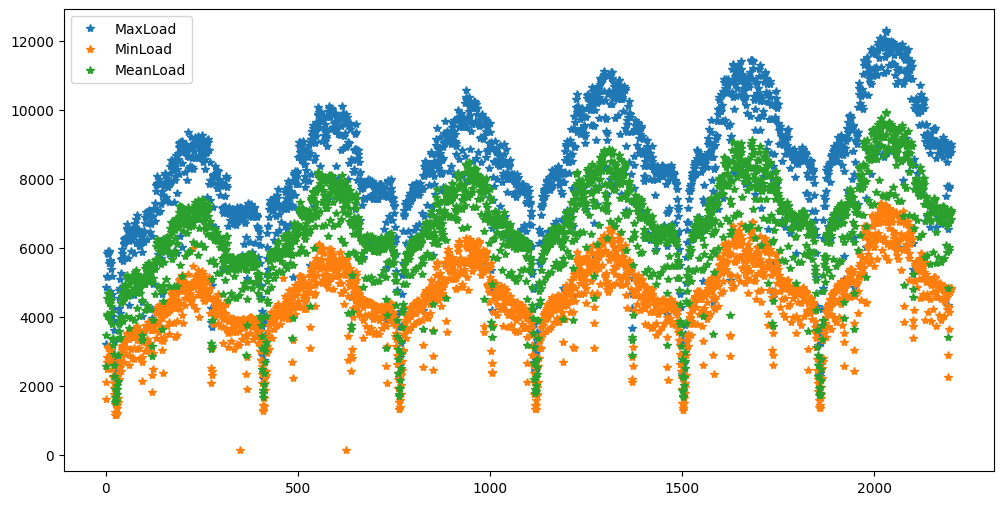

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['MaxLoad'], marker='*', linestyle='None', label='MaxLoad')
plt.plot(data['MinLoad'], marker='*', linestyle='None', label='MinLoad')
plt.plot(data['MeanLoad'], marker='*', linestyle='None', label='MeanLoad')
plt.legend()
plt.show()